# 09 - Introduction to Neural Networks

by [Fabio A. González](http://dis.unal.edu.co/~fgonza/), Universidad Nacional de Colombia

version 1.0, June 2018

## Part of the class [Applied Deep Learning](https://github.com/albahnsen/AppliedDeepLearningClass)


This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). 


To run this notebook you need to download Pybrain (https://github.com/pybrain/pybrain) and copy the `pybrain` folder to the same folder where this notebook is.



In [19]:

import pybrain
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Artificial Neuron

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/6/60/ArtificialNeuronModel_english.png/600px-ArtificialNeuronModel_english.png" >

$$o_j^{(n)} = \varphi\left(\sum_{i\; in\; layer (n-1)}w_{ij}o_i^{(n-1)} \right)$$

## Step activation function
<img src="https://c.mql5.com/2/4/act1.png" align="middle">

## Logistic activation function

$$\varphi(x) = \frac{1}{1 - e^{-(x-b)}}$$

<img width= 300 src="http://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/SigmoidFunction.png/400px-SigmoidFunction.png" align="middle">

### Question: How to program an artificial neuron to calculate the *and* function?

<br>
<table>
<tr>
<th>$X$</th>
<th>$Y$</th>
<th>$X$ and $Y$</th>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td style="text-align:center">0</td>
</tr>
<tr>
<td>0</td>
<td>1</td>
<td style="text-align:center">0</td>
</tr>
<tr>
<td>1</td>
<td>0</td>
<td style="text-align:center">0</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td style="text-align:center">1</td>
</tr>
</table>

## AND Neural Network

<img width=500 src="2in-neuron.jpg" align="middle">

In [20]:
from pybrain.tools.shortcuts import buildNetwork
net = buildNetwork(2, 1, outclass=pybrain.SigmoidLayer)
print(net.params)


[ 0.10693711 -0.5462095   0.88730854]


In [21]:
def print_pred2(dataset, network):
    df = pd.DataFrame(dataset.data['sample'][:dataset.getLength()],columns=['X', 'Y'])
    prediction = np.round(network.activateOnDataset(dataset),3)
    df['output'] = pd.DataFrame(prediction)
    return df

from pybrain.datasets import UnsupervisedDataSet, SupervisedDataSet
D = UnsupervisedDataSet(2) # define a dataset in pybrain
D.addSample([0,0])
D.addSample([0,1])
D.addSample([1,0])
D.addSample([1,1])
print_pred2(D, net)

,X,Y,output
0,0.0,0.0,0.527
1,0.0,1.0,0.730
2,1.0,0.0,0.392
3,1.0,1.0,0.610


## AND Neural Network
<img width=500 src="2in-neuron.jpg" align="middle">

In [30]:
net.params[:] = [ -150, -100,  100]
print_pred2(D, net)

,X,Y,output
0,0.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,1.0,1.0,0.0


### Question: How to program an artificial neuron to calculate the *xor* function?
<br/>
<table>
<tr>
<th>$X$</th>
<th>$Y$</th>
<th>$X$ xor $Y$</th>
</tr>
<tr>
<td>0</td>
<td>0</td>
<td style="text-align:center">0</td>
</tr>
<tr>
<td>0</td>
<td>1</td>
<td style="text-align:center">1</td>
</tr>
<tr>
<td>1</td>
<td>0</td>
<td style="text-align:center">1</td>
</tr>
<tr>
<td>1</td>
<td>1</td>
<td style="text-align:center">0</td>
</tr>
</table>

## Plotting the NN Output

In [31]:
def plot_nn_prediction(N): 
    # a function to plot the binary output of a network on the [0,1]x[0,1] space
    x_list = np.arange(0.0,1.0,0.025)
    y_list = np.arange(1.0,0.0,-0.025)    
    z = [0.0 if N.activate([x,y])[0] <0.5 else 1.0  for y in y_list for x in x_list]
    z = np.array(z)
    grid = z.reshape((len(x_list), len(y_list)))
    plt.imshow(grid, extent=(x_list.min(), x_list.max(), y_list.min(), y_list.max()),cmap=plt.get_cmap('Greys_r'))
    plt.show()

## Plotting the NN Output

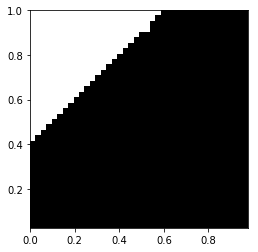

In [35]:
net.params[:] = [-20, -50, 50]
plot_nn_prediction(net)

<br/>
<br/>
## Answer: It is impossible with only one neuron!
<br/>
<br/>   

  
## We need to use more than one neuron....

## Multilayer Neural Network
<img src="http://www.cs.nott.ac.uk/~gxk/courses/g5aiai/006neuralnetworks/images/ffnet.jpg">

## Learning an XOR NN

In [39]:
Dtrain = SupervisedDataSet(2,1) # define a dataset in pybrain
Dtrain.addSample([0,0],[0])
Dtrain.addSample([0,1],[1])
Dtrain.addSample([1,0],[1])
Dtrain.addSample([1,1],[0])

from pybrain.supervised.trainers import BackpropTrainer

net = buildNetwork(2, 2, 1, hiddenclass=pybrain.SigmoidLayer, outclass=pybrain.SigmoidLayer)
T = BackpropTrainer(net, learningrate=0.1, momentum=0.9)
T.trainOnDataset(Dtrain, 1000)
print_pred2(D, net)

,X,Y,output
0,0.0,0.0,0.079
1,0.0,1.0,0.929
2,1.0,0.0,0.929
3,1.0,1.0,0.087


## XOR NN Output Plot

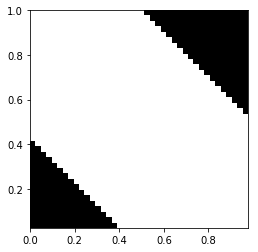

In [40]:
plot_nn_prediction(net)

## The Little Red Riding Hood Neural Network

<img src="http://themaleharem.com/wp-content/uploads/2014/06/Walter-crane-little-red-riding-hood-meets-the-wolf-in-the-woods.jpg">

## LRRH Network Architecture

<img src="lrrh_net.jpg">

## Training


In [42]:
from pybrain.tools.validation import Validator

validator =  Validator()
Dlrrh = SupervisedDataSet(4,4) 
Dlrrh.addSample([1,1,0,0],[1,0,0,0])
Dlrrh.addSample([0,1,1,0],[0,0,1,1])
Dlrrh.addSample([0,0,0,1],[0,1,1,0])
df = pd.DataFrame(Dlrrh['input'],columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled'])
print (df.join(pd.DataFrame(Dlrrh['target'],columns=['Scream', 'Hug', 'Food', 'Kiss'])))
net = buildNetwork(4, 3, 4, hiddenclass=pybrain.SigmoidLayer, outclass=pybrain.SigmoidLayer)


   Big Ears  Big Teeth  Handsome  Wrinkled  Scream  Hug  Food  Kiss
0       1.0        1.0       0.0       0.0     1.0  0.0   0.0   0.0
1       0.0        1.0       1.0       0.0     0.0  0.0   1.0   1.0
2       0.0        0.0       0.0       1.0     0.0  1.0   1.0   0.0


## Backpropagation

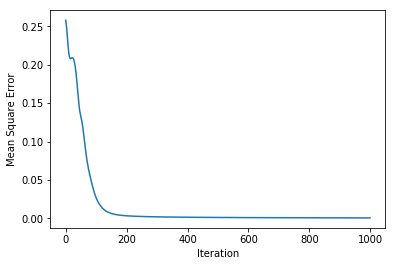

In [43]:
T = BackpropTrainer(net, learningrate=0.01, momentum=0.99)
scores = []
for i in range(1000):
    T.trainOnDataset(Dlrrh, 1)
    prediction = net.activateOnDataset(Dlrrh)
    scores.append(validator.MSE(prediction, Dlrrh.getField('target')))
plt.ylabel('Mean Square Error')
plt.xlabel('Iteration')
plt.plot(scores)


## Learning as optimization

General optimization problem:

$$\min_{f\in H}L(f,D)$$

with $H$: hypothesis space, $D$:training data, $L$:loss/error

## Example, least squares linear regression:
$$\min_{f\in H}L(f,D)$$
* Hypothesis space:
$f(x)=w^{T}x$
* Data: $D = \{(x_1, t_1), \dots , (x_n, t_n)\}$
* Least squares loss: 
$$L(f, D)=-\sum_{t_i \in D}(t_{i} - f(x_i))^2$$

## Example, logistic regression:
$$\min_{f\in H}L(f,D)$$
* Hypothesis space:
$f(x)=P(C_{+}|x)=\sigma(w^{T}x)$
* Data: $D = \{(x_1, t_1), \dots , (x_n, t_n)\}$
* Cross-entropy error: 
$$E(f,D)=-\ln p(D|f)=-\sum_{t_i \in D}(t_{n}\ln y_{n}+(1-t_{n})\ln(1-y_{n}))$$

## Gradient descent

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/03/06100746/grad.png">

## Prediction

In [44]:
def lrrh_input(vals):
    return pd.DataFrame(vals,index=['big ears', 'big teeth', 'handsome', 'wrinkled'], columns=['input'])

def lrrh_output(vals):
    return pd.DataFrame(vals,index=['scream', 'hug', 'offer food', 'kiss cheek'], columns=['output'])

In [55]:
in_vals = [0, 0, 0, 0]
lrrh_input(in_vals)

,input
big ears,0
big teeth,0
handsome,0
wrinkled,0


In [56]:
lrrh_output(net.activate(in_vals))

,output
scream,0.094123
hug,0.720330
offer food,0.964422
kiss cheek,0.035398
